In [1]:
import sys

!which {sys.executable}

/ut3/jerome/miniconda3/envs/wakai/bin/python


# Perren+2023 catalog

In [3]:
import pandas as pd

#https://zenodo.org/records/8250524
df = pd.read_csv('../data/Perren2023/UCC_cat.csv.gz')
df.tail()

,ID,RA_ICRS,DE_ICRS,plx,pmRA,pmDE,UCC_ID,N_50,r_50,RA_ICRS_m,DE_ICRS_m,plx_m,pmRA_m,pmDE_m,Rv_m,N_Rv,C1,C2,C3
13679,MKN 1;MKN ab,266.44685,-29.08737,NaN,NaN,NaN,UCC G359.8-00.1,79,4.4,266.462,-29.095,0.489,1.753,-0.777,-25.868,5,0.86,0.75,AA
13680,MWSC 5326,248.19246,-17.14304,NaN,NaN,NaN,UCC G359.9+20.4,0,4.6,248.189,-17.148,0.090,-3.735,-5.860,67.828,1,0.11,0.20,DD
13681,HSC 2986,285.31711,-36.88340,6.694,2.209,-27.556,UCC G359.9-17.7,0,22.5,285.298,-36.941,6.532,3.670,-27.737,-5.275,8,0.72,1.00,BA
13682,VVV 149;VVV-CL 149,267.33796,-29.46396,NaN,NaN,NaN,UCC G359.9-00.9,0,2.6,267.351,-29.455,0.352,-0.674,-2.780,-39.904,3,0.45,0.46,CC
13683,Ryu 535,266.58836,-29.05732,NaN,NaN,NaN,UCC G359.9-00.2,61,2.1,266.606,-29.055,0.376,-0.153,-2.099,-33.921,4,0.88,0.31,AC


In [4]:
df_mem = pd.read_parquet('../data/Perren2023/UCC_members.parquet.gz')
df_mem.tail()

,name,Source,RA_ICRS,DE_ICRS,Plx,e_Plx,pmRA,e_pmRA,pmDE,e_pmDE,RV,e_RV,GLON,GLAT,Gmag,BP-RP,e_Gmag,e_BP-RP,probs
1337309,ryu30,5933719906152539904,247.228085,-52.699637,0.240993,0.158018,-4.525831,0.154389,-4.983059,0.127764,NaN,NaN,332.477863,-2.781450,18.330563,2.435881,0.003246,0.088112,0.46891
1337310,ryu30,5933720318469495424,247.180385,-52.706245,0.135389,0.053207,-4.841031,0.055405,-5.292475,0.045611,NaN,NaN,332.453112,-2.765083,16.444132,1.731100,0.002817,0.009220,0.45149
1337311,ryu30,5933720107969318016,247.178643,-52.736859,0.300294,0.121510,-4.620295,0.120153,-5.140017,0.103496,NaN,NaN,332.430199,-2.785444,17.966627,1.370831,0.002976,0.017981,0.45149
1337312,ryu30,5933720490268392704,247.119139,-52.692309,0.270647,0.230620,-4.524732,0.220578,-4.939661,0.182071,NaN,NaN,332.437554,-2.728610,18.863051,2.578410,0.003619,0.063381,0.41418
1337313,ryu30,5933730587694794880,247.078632,-52.721215,0.231349,0.169833,-4.648944,0.173652,-4.778104,0.143794,NaN,NaN,332.399658,-2.730834,18.484586,NaN,0.003323,NaN,0.40547


In [5]:
#replace name to be compatible with other catalogs' naming formats
df_mem = df_mem.rename({"name": "Name",
                        "Source": "GaiaDR3",
                        "probs": "Prob",
                        "RA_ICRS": "ra",
                        "DE_ICRS": "dec",
                        "pmRA": "pmra",
                        "pmDE": "pmdec",
                        "Plx": "parallax",
                        "RV": "radial_velocity"
                        }, axis=1)
df_mem

,Name,GaiaDR3,ra,dec,parallax,e_Plx,pmra,e_pmRA,pmdec,e_pmDE,radial_velocity,e_RV,GLON,GLAT,Gmag,BP-RP,e_Gmag,e_BP-RP,Prob
0,teutsch288,2035397237977138688,297.899779,34.283035,0.145318,0.024893,-2.974327,0.023901,-5.158872,0.030316,-37.576607,4.797507,69.829982,3.785472,15.418702,2.254350,0.002774,0.005336,0.99767
1,teutsch288,2035389575755522944,297.965276,34.067585,0.145510,0.027632,-2.991828,0.030353,-5.123003,0.031205,NaN,NaN,69.671655,3.629290,15.662445,2.212796,0.002788,0.006342,0.98601
2,teutsch288,2035488463077136512,298.127866,34.400420,0.103535,0.027940,-3.008745,0.025883,-5.085567,0.030720,NaN,NaN,70.027281,3.683075,15.776573,2.014382,0.002781,0.005409,0.95804
3,teutsch288,2035393458405832448,298.028314,34.250542,0.288494,0.011875,-3.031625,0.012742,-5.184984,0.013464,-14.070918,0.746670,69.856073,3.677483,13.459954,2.037782,0.002763,0.004934,0.86946
4,teutsch288,2035491486734157440,298.106791,34.426259,0.070932,0.015924,-2.982798,0.014108,-5.185106,0.016694,-45.478336,1.353905,70.040681,3.711202,14.410107,2.713133,0.002785,0.005189,0.86946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337309,ryu30,5933719906152539904,247.228085,-52.699637,0.240993,0.158018,-4.525831,0.154389,-4.983059,0.127764,NaN,NaN,332.477863,-2.781450,18.330563,2.435881,0.003246,0.088112,0.46891
1337310,ryu30,5933720318469495424,247.180385,-52.706245,0.135389,0.053207,-4.841031,0.055405,-5.292475,0.045611,NaN,NaN,332.453112,-2.765083,16.444132,1.731100,0.002817,0.009220,0.45149
1337311,ryu30,5933720107969318016,247.178643,-52.736859,0.300294,0.121510,-4.620295,0.120153,-5.140017,0.103496,NaN,NaN,332.430199,-2.785444,17.966627,1.370831,0.002976,0.017981,0.45149
1337312,ryu30,5933720490268392704,247.119139,-52.692309,0.270647,0.230620,-4.524732,0.220578,-4.939661,0.182071,NaN,NaN,332.437554,-2.728610,18.863051,2.578410,0.003619,0.063381,0.41418


In [6]:
#remove spaces
df['Name'] = df.ID.apply(lambda x: x.lower().replace(' ', '').split(';')[0])
df.Name.isin(df_mem.Name).sum()

np.int64(13308)

In [7]:
len(df_mem.Name.unique())

16177

https://ucc.ar/_clusters/ngc1039/

Text(0.5, 0.98, 'NGC 1039')

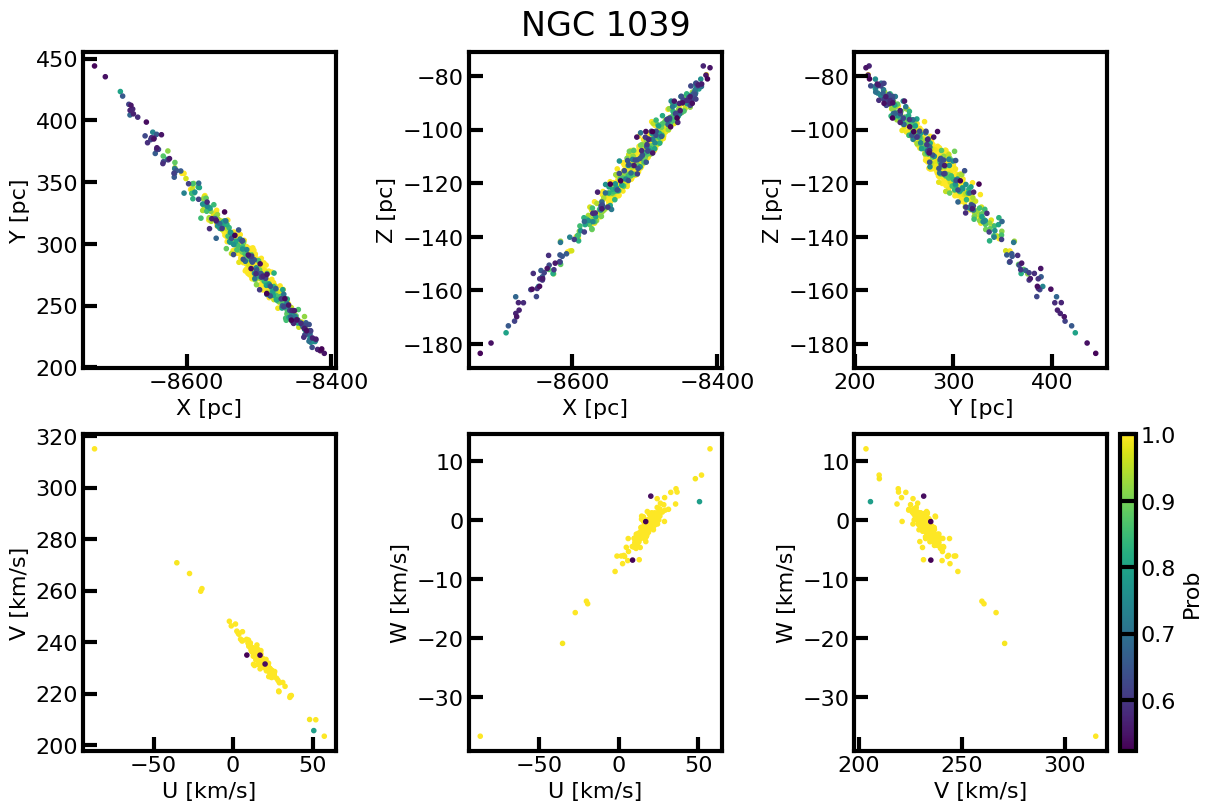

In [8]:
%matplotlib inline

from catalog import plot_xyz_uvw
name = "NGC 1039"
cname = name.lower().replace(' ', '')

d = df_mem.query("Name==@cname")
assert len(d)>0
assert sum(d.Prob>0.5)>10
fig = plot_xyz_uvw(d, color='Prob', 
                   # target_gaiaid=gaiaid, 
                   # target_label=f"TOI-{toiid}\nProb={prob*100:.1f}%", 
                   # target_color="r",
                   # target_size=500,
                   marker='.',
                   cmap="viridis");
fig.suptitle(name)

# Hunt+2023 catalog

In [9]:
from catalog import CatalogDownloader

cd = CatalogDownloader(catalog_name="Hunt2023", catalog_type="cluster")
tabs = cd.get_tables_from_vizier(row_limit=-1, save=True)

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/673/A114
{'J/A+A/673/A114/clusters': 'Main catalogue (Table 3)',
 'J/A+A/673/A114/clustrej': 'Objects rejected from main catalogue',
 'J/A+A/673/A114/crossma': 'All (non-)xmatched clusters (Table B.1)',
 'J/A+A/673/A114/members': 'Member stars of clusters (corrected version)',
 'J/A+A/673/A114/membrej': 'Member stars of rejected clusters'}
Saved: ../data/Hunt2023/Hunt2023_tab0.txt
Saved: ../data/Hunt2023/Hunt2023_tab1.txt
Saved: ../data/Hunt2023/Hunt2023_tab2.txt
Saved: ../data/Hunt2023/Hunt2023_tab3.txt
Saved: ../data/Hunt2023/Hunt2023_tab4.txt


In [16]:
df = tabs[0].to_pandas()
df_mem = tabs[1].to_pandas()
df_mem.head()

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,52.756558,34.689531,221090730122510976,1.3799,-1.601,-1.205,NaN,13.058100,0.9138,0.8,ASCC_10,52.756566,34.689536
1,52.730263,34.341461,221065132117493376,1.6550,-2.455,-1.998,NaN,14.775700,1.2807,0.6,ASCC_10,52.730275,34.341469
2,52.684345,34.003600,220988819138630016,1.5876,-2.437,-0.949,NaN,10.883200,0.7241,0.1,ASCC_10,52.684358,34.003604
3,52.676106,34.733687,221094367958697088,1.5586,-1.532,-1.558,NaN,16.879801,1.8380,0.7,ASCC_10,52.676114,34.733694
4,52.712100,34.578004,221083888238423552,1.4173,-1.403,-1.242,NaN,17.980000,2.2854,0.6,ASCC_10,52.712107,34.578009


In [33]:
#replace name to be compatible with other catalogs' naming formats
df_mem = df_mem.rename({"Cluster": "Name",
                        "Source": "GaiaDR3",
                        "Proba": "Prob",
                        "RA_ICRS": "ra",
                        "DE_ICRS": "dec",
                        "pmRA": "pmra",
                        "pmDE": "pmdec",
                        "Plx": "parallax",
                        "RV": "radial_velocity"
                        }, axis=1)
df_mem.head()

,ra,dec,GaiaDR3,parallax,pmra,pmdec,radial_velocity,Gmag,BP-RP,Prob,Name,_RA.icrs,_DE.icrs
0,52.756558,34.689531,221090730122510976,1.3799,-1.601,-1.205,NaN,13.058100,0.9138,0.8,ASCC_10,52.756566,34.689536
1,52.730263,34.341461,221065132117493376,1.6550,-2.455,-1.998,NaN,14.775700,1.2807,0.6,ASCC_10,52.730275,34.341469
2,52.684345,34.003600,220988819138630016,1.5876,-2.437,-0.949,NaN,10.883200,0.7241,0.1,ASCC_10,52.684358,34.003604
3,52.676106,34.733687,221094367958697088,1.5586,-1.532,-1.558,NaN,16.879801,1.8380,0.7,ASCC_10,52.676114,34.733694
4,52.712100,34.578004,221083888238423552,1.4173,-1.403,-1.242,NaN,17.980000,2.2854,0.6,ASCC_10,52.712107,34.578009


Text(0.5, 0.98, 'NGC_1027')

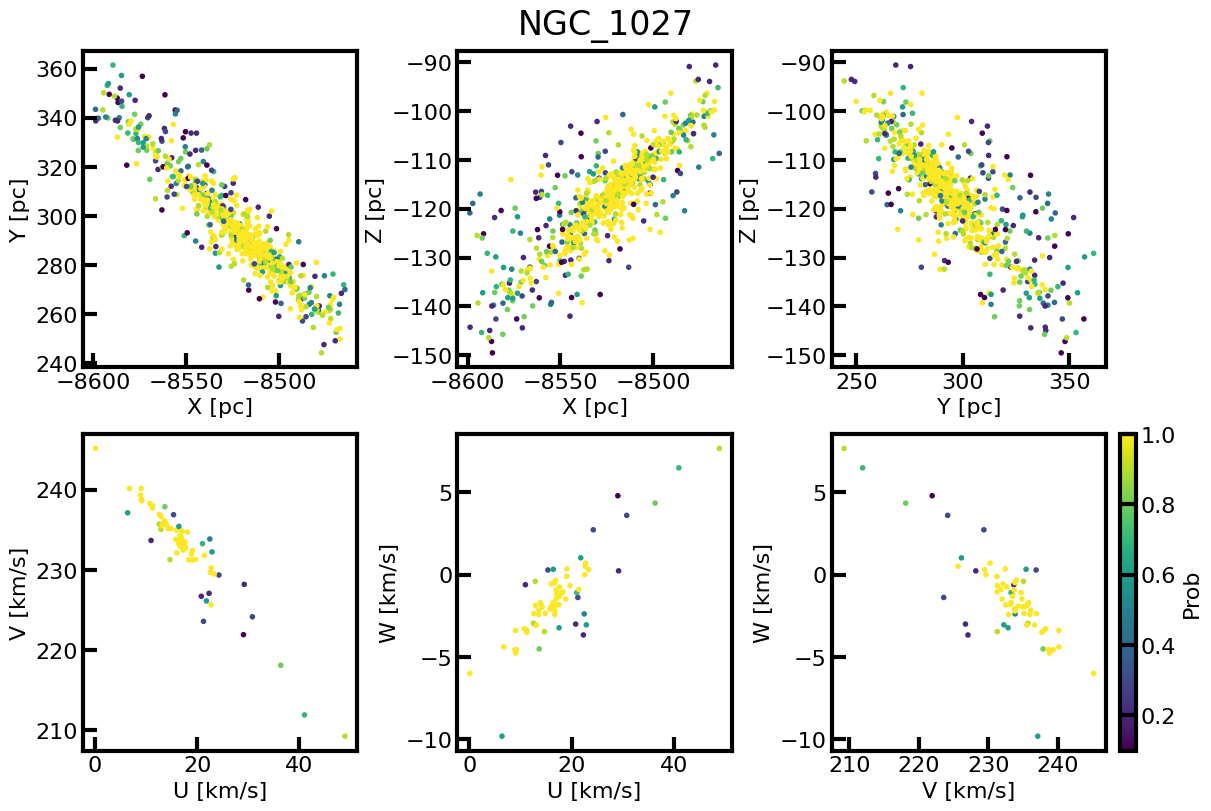

In [35]:
%matplotlib inline

from catalog import plot_xyz_uvw

cname = "NGC_1039"
d = df_mem.query("Name==@cname")
assert len(d)>0
assert sum(d.Prob>0.5)>10
fig = plot_xyz_uvw(d, 
                   color='Prob', 
                   # target_gaiaid=gaiaid, 
                   # target_label=f"TOI-{toiid}\nProb={prob*100:.1f}%", 
                   # target_color="r",
                   # target_size=500,
                   marker='.',
                   cmap="viridis");
fig.suptitle(cname)

# Cantat-Gaudin+2020 catalog

In [36]:
from catalog import CatalogDownloader

cd = CatalogDownloader(catalog_name="CantatGaudin2020", catalog_type="cluster")
tabs = cd.get_tables_from_vizier(row_limit=-1)

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/633/A99
{'J/A+A/633/A99/members': '*Members',
 'J/A+A/633/A99/table1': 'Mean parameters of the identified clusters'}


In [38]:
df = tabs[0].to_pandas()
df_mem = tabs[1].to_pandas()
df_mem.head()

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,52.756558,34.689531,221090730122510976,1.3799,-1.601,-1.205,NaN,13.058100,0.9138,0.8,ASCC_10,52.756566,34.689536
1,52.730263,34.341461,221065132117493376,1.6550,-2.455,-1.998,NaN,14.775700,1.2807,0.6,ASCC_10,52.730275,34.341469
2,52.684345,34.003600,220988819138630016,1.5876,-2.437,-0.949,NaN,10.883200,0.7241,0.1,ASCC_10,52.684358,34.003604
3,52.676106,34.733687,221094367958697088,1.5586,-1.532,-1.558,NaN,16.879801,1.8380,0.7,ASCC_10,52.676114,34.733694
4,52.712100,34.578004,221083888238423552,1.4173,-1.403,-1.242,NaN,17.980000,2.2854,0.6,ASCC_10,52.712107,34.578009


In [39]:
#replace name to be compatible with other catalogs' naming formats
df_mem = df_mem.rename({"Cluster": "Name",
                        "Source": "GaiaDR3",
                        "Proba": "Prob",
                        "RA_ICRS": "ra",
                        "DE_ICRS": "dec",
                        "pmRA": "pmra",
                        "pmDE": "pmdec",
                        "Plx": "parallax",
                        "RV": "radial_velocity"
                        }, axis=1)
df_mem.head()

,ra,dec,GaiaDR3,parallax,pmra,pmdec,radial_velocity,Gmag,BP-RP,Prob,Name,_RA.icrs,_DE.icrs
0,52.756558,34.689531,221090730122510976,1.3799,-1.601,-1.205,NaN,13.058100,0.9138,0.8,ASCC_10,52.756566,34.689536
1,52.730263,34.341461,221065132117493376,1.6550,-2.455,-1.998,NaN,14.775700,1.2807,0.6,ASCC_10,52.730275,34.341469
2,52.684345,34.003600,220988819138630016,1.5876,-2.437,-0.949,NaN,10.883200,0.7241,0.1,ASCC_10,52.684358,34.003604
3,52.676106,34.733687,221094367958697088,1.5586,-1.532,-1.558,NaN,16.879801,1.8380,0.7,ASCC_10,52.676114,34.733694
4,52.712100,34.578004,221083888238423552,1.4173,-1.403,-1.242,NaN,17.980000,2.2854,0.6,ASCC_10,52.712107,34.578009


Text(0.5, 0.98, 'NGC_1039')

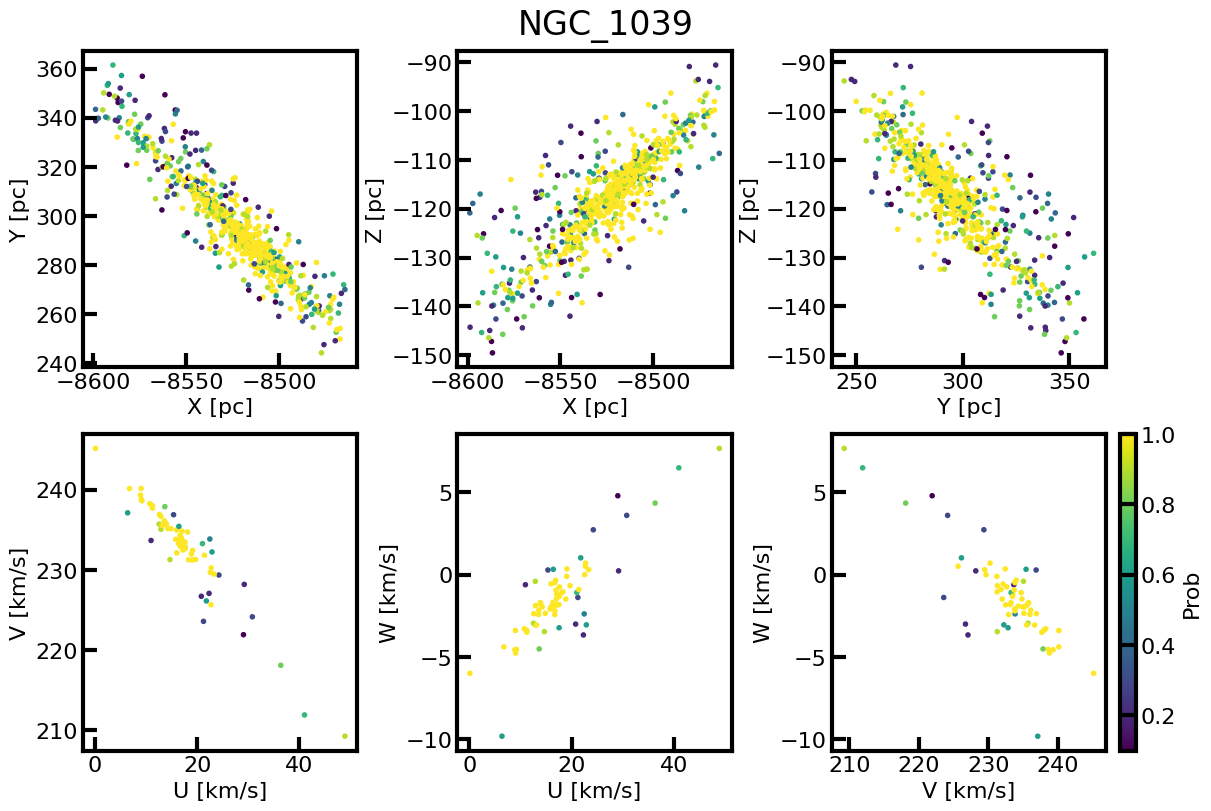

In [40]:
%matplotlib inline

from catalog import plot_xyz_uvw

cname = "NGC_1039"
d = df_mem.query("Name==@cname")
assert len(d)>0
assert sum(d.Prob>0.5)>10
fig = plot_xyz_uvw(d, 
                   color='Prob', 
                   # target_gaiaid=gaiaid, 
                   # target_label=f"TOI-{toiid}\nProb={prob*100:.1f}%", 
                   # target_color="r",
                   # target_size=500,
                   marker='.',
                   cmap="viridis");
fig.suptitle(cname)

# Plots

Text(0.5, 1.0, 'NGC_1039')

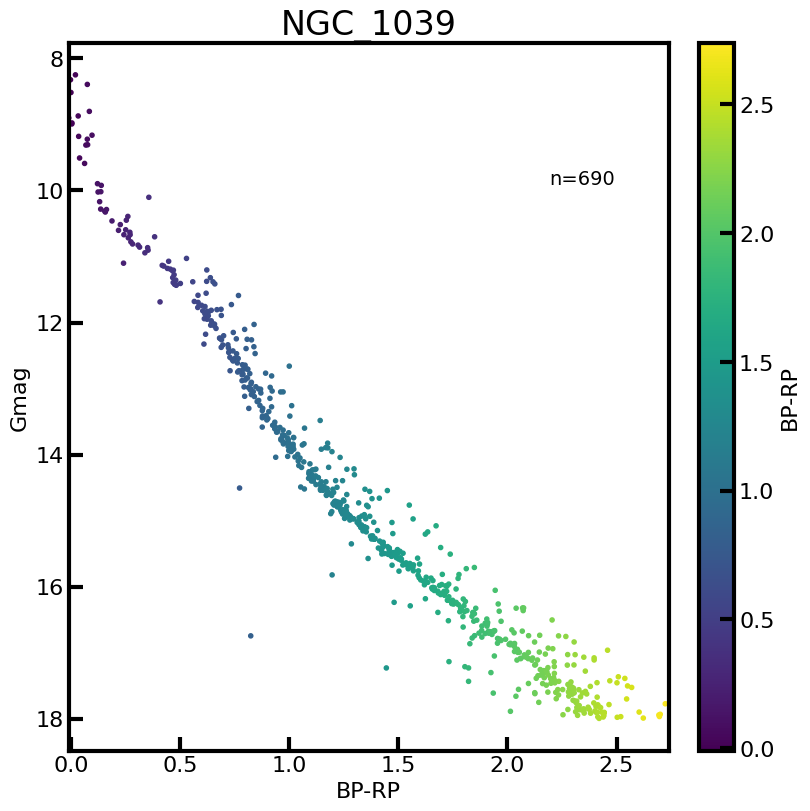

In [45]:
from catalog import plot_cmd

cname = "NGC_1039"
d = df_mem.query("Name==@cname")
ax = plot_cmd(d, xaxis='BP-RP', yaxis='Gmag', color='BP-RP')
ax.set_title(cname)

# FOV

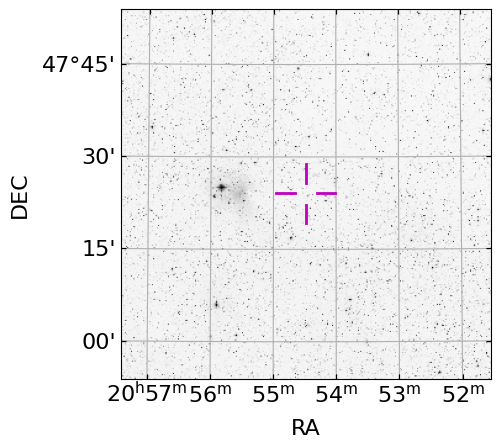

In [11]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroplan.plots import plot_finder_image

fov_rad = 60*u.arcmin
obj_coord = SkyCoord(ra=ra, dec=dec, unit=(u.hourangle, u.deg))

#plot fov
ax, hdu = plot_finder_image(obj_coord, fov_radius=fov_rad, survey='DSS2 Red', reticle=True)